Data Analytics Immersion Exercise 4.10 Part 1 B

Creating aggregation using customer profiles based on

    Frequency
	
    Expenditure

Creating visualizations comparing

    Loyalty by region
	
    Loyalty by department

Spending flag by region

Spending flag by department

Age group by region

Age group by department

Income bracket by region

Income bracket by department

Provider status by region

Provider status by department

Updated bar chart orders by day

Updated histogram of prices

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import scipy

In [2]:
#Setting path

path = r"C:\Users\luiss\OneDrive\Career Foundry\Instacart Basket Analysis"

In [3]:
#Importing data

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'CFO updated.pkl'))

In [4]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,income,_merge,Region,Activity_flag,Age group,Income Bracket,department,Department group,Provider status,total_spent
0,2147910,206056,3,1,9,11.0,24097,35,0,Rotini Pasta,...,63570,both,Midwest,Active,Adult,Middle Income,dry goods pasta,Foods,"married, no dep",781.8
1,2978133,153037,2,1,7,6.0,28985,2,0,Michigan Organic Kale,...,26026,both,South,Active,Young adult,Low Income,produce,Foods,"married, no dep",251.9
2,1126886,153037,7,4,13,7.0,3957,2,1,100% Raw Coconut Water,...,26026,both,South,Active,Young adult,Low Income,beverages,Foods,"married, no dep",251.9
3,1902776,153037,6,4,7,11.0,14233,1,1,Natural Artesian Water,...,26026,both,South,Active,Young adult,Low Income,beverages,Foods,"married, no dep",251.9
4,750438,178710,7,1,7,30.0,47766,4,0,Organic Avocado,...,74457,both,West,Active,Young adult,Middle Income,produce,Foods,"married, no dep",792.0


Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30965686 entries, 0 to 30965685
Data columns (total 38 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       object  
 1   user_id                        object  
 2   order_number                   int64   
 3   orders_day_of_week             int8    
 4   order_hour_of_day              int8    
 5   days_since_prior_order         float64 
 6   product_id                     int64   
 7   add_to_cart_order              int64   
 8   reordered                      int8    
 9   product_name                   object  
 10  aisle_id                       int16   
 11  department_id                  int8    
 12  prices                         float64 
 13  price_range_loc                category
 14  busiest_day                    category
 15  busiest_period_of_day          category
 16  max_order                      int16   
 17  loyalty_flag             

Will use median days since prior order and prices for usage frequency and expenditures

In [6]:
#Creating usage frequency min, mean, max

usage_agg = df.groupby(['loyalty_flag', 'spending_flag', 'frequency_flag', 'Gender', 'Region', 'Age group', 'Income Bracket',
                        'Provider status'], observed=True).agg({'median_days_since_prior_order': ['min', 'mean', 'max']})

In [7]:
usage_agg

median_days_since_prior_order  \
                                                                                                                                    min   
loyalty_flag   spending_flag frequency_flag     Gender Region  Age group   Income Bracket Provider status                                 
New customer   High spender  Frequenct customer Female Midwest Young adult Middle Income  single, no dep                            0.0   
                                                                                          single, dep                               3.5   
                                                                                          married, dep                              6.0   
                                                               Adult       Middle Income  married, no dep                           6.0   
                                                                                          married, dep                              4.0   
...                                                                                                                                 ...   
Loyal customer Low spender   Regular customer   Female South   Elderly     High Income    married, no dep                          11.0   
                                                Male   Midwest Middle aged Low Income     married, dep                             11.0   
                                                       South   Middle aged Middle Income  single, no dep                           11.0   
                                                                           High Income    married, no dep                          11.0   
                                                       West    Elderly     High Income    single, no dep                           11.0   

                                                                                                                      \
                                                                                                                mean   
loyalty_flag   spending_flag frequency_flag     Gender Region  Age group   Income Bracket Provider status              
New customer   High spender  Frequenct customer Female Midwest Young adult Middle Income  single, no dep    4.604396   
                                                                                          single, dep       6.459459   
                                                                                          married, dep      6.000000   
                                                               Adult       Middle Income  married, no dep   6.454054   
                                                                                          married, dep      5.770335   
...                                                                                                              ...   
Loyal customer Low spender   Regular customer   Female South   Elderly     High Income    married, no dep  11.000000   
                                                Male   Midwest Middle aged Low Income     married, dep     11.000000   
                                                       South   Middle aged Middle Income  single, no dep   11.000000   
                                                                           High Income    married, no dep  11.000000   
                                                       West    Elderly     High Income    single, no dep   11.000000   

                                                                                                                 
                                                                                                            max  
loyalty_flag   spending_flag frequency_flag     Gender Region  Age group   Income Bracket Provider status        
New customer   High spender  Frequenct customer Female Midwest Young adult Middle Income  single, no dep    8.0  
                      

In [8]:
#Creating total expenditure column

df['total_spent'] = df.groupby(['user_id'])['prices'].transform("sum")

In [9]:
#Creating aggregate using same columns from above but for total spent

spending_agg = df.groupby(['loyalty_flag', 'spending_flag', 'frequency_flag', 'Gender', 'Region', 'Age group', 'Income Bracket',
                        'Provider status'], observed=True).agg({'total_spent': ['min', 'mean', 'max']})

spending_agg

total_spent  \
                                                                                                                  min   
loyalty_flag   spending_flag frequency_flag     Gender Region  Age group   Income Bracket Provider status               
New customer   High spender  Frequenct customer Female Midwest Young adult Middle Income  single, no dep        136.4   
                                                                                          single, dep           136.7   
                                                                                          married, dep          261.6   
                                                               Adult       Middle Income  married, no dep       168.2   
                                                                                          married, dep          127.9   
...                                                                                                               ...   
Loyal customer Low spender   Regular customer   Female South   Elderly     High Income    married, no dep      3490.7   
                                                Male   Midwest Middle aged Low Income     married, dep          612.8   
                                                       South   Middle aged Middle Income  single, no dep       3776.9   
                                                                           High Income    married, no dep      4865.5   
                                                       West    Elderly     High Income    single, no dep       2996.2   

                                                                                                                        \
                                                                                                                  mean   
loyalty_flag   spending_flag frequency_flag     Gender Region  Age group   Income Bracket Provider status                
New customer   High spender  Frequenct customer Female Midwest Young adult Middle Income  single, no dep    365.481319   
                                                                                          single, dep       315.800901   
                                                                                          married, dep      261.600000   
                                                               Adult       Middle Income  married, no dep   827.304865   
                                                                                          married, dep      836.186124   
...                                                                                                                ...   
Loyal customer Low spender   Regular customer   Female South   Elderly     High Income    married, no dep  3490.700000   
                                                Male   Midwest Middle aged Low Income     married, dep      612.800000   
                                                       South   Middle aged Middle Income  single, no dep   3776.900000   
                                                                           High Income    married, no dep  4865.500000   
                                                       West    Elderly     High Income    single, no dep   2996.200000   

                                                                                                                   
                                                                                                              max  
loyalty_flag   spending_flag frequency_flag     Gender Region  Age group   Income Bracket Provider status          
New customer   High spender  Frequenct customer Female Midwest Young adult Middle Income  single, no dep    450.2  
                                                                                          single, dep       501.5  
                                                                                          married, dep      261.6  
      

Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [5]:
#Comparing loyalty by region

loyalty_region_cross = pd.crosstab(df['loyalty_flag'], df['Region'], dropna = False)
loyalty_region_cross

Region,Midwest,Northeast,South,West
loyalty_flag,,,,
New customer,1136804,842195,1593723,1231173
Regular customer,3751105,2780851,5311859,4033580
Loyal customer,2373854,1841833,3405949,2662760


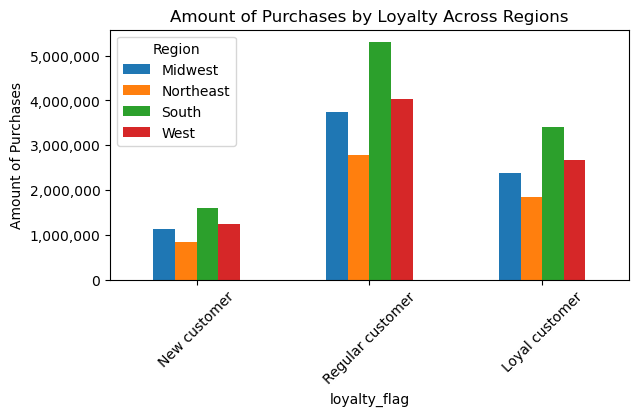

In [6]:
#Creating bar chart

loyalty_region_bar = loyalty_region_cross.plot.bar()

#Labeling chart
plt.title('Amount of Purchases by Loyalty Across Regions')
plt.ylabel('Amount of Purchases')
plt.xticks(rotation = 45)
plt.tight_layout(pad=3)

#Removing scientific notation
loyalty_region_bar.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

#Setting index by loyalty status ascending
loyalty_order = ['New customer', 'Regular customer', 'Loyal customer']
df['loyalty_flag'] = pd.Categorical(df['loyalty_flag'], categories = loyalty_order, ordered=True)
df = df.sort_values('loyalty_flag').reset_index(drop=True)

#Exporting chart

loyalty_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty region bar.png'))

In [70]:
#Comparing loyalty by department

loyalty_dept_cross = pd.crosstab(df['department'], df['loyalty_flag'])
loyalty_dept_cross.to_clipboard()
loyalty_dept_cross

loyalty_flag,New customer,Regular customer,Loyal customer
department,,,
alcohol,28647,77301,38726
babies,46708,196576,167108
bakery,172104,568851,379873
beverages,396649,1320235,855017
breakfast,106356,343650,221866
bulk,4149,15468,13834
canned goods,180196,537284,294594
dairy eggs,750056,2596419,1830707
deli,158335,521453,324046


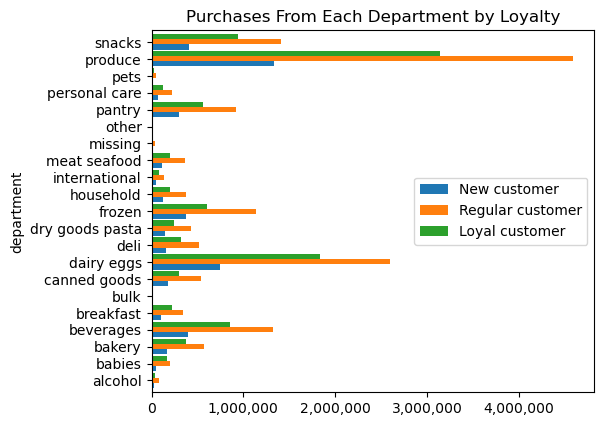

In [69]:
#Creating bar chart

loyalty_dept_bar = loyalty_dept_cross.plot.barh(width = 0.9)

#Labeling chart
plt.title('Purchases From Each Department by Loyalty')
plt.tight_layout(pad=2)

#Removing Scientific Notation
loyalty_dept_bar.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

#Moving legend over
plt.legend(loc='right', bbox_to_anchor=(1, 0.5))

#Exporting chart
loyalty_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty dept bar.png'))

In [20]:
#comparing loyalty of customers across departments

deptgroup_loyalty_cross = pd.crosstab(df['loyalty_flag'], df['Department group'])
deptgroup_loyalty_cross['Percentage Food Customers'] = deptgroup_loyalty_cross['Foods'] / (deptgroup_loyalty_cross['Foods'] + deptgroup_loyalty_cross['Non-food Misc']) * 100

deptgroup_loyalty_cross

Department group,Foods,Non-food Misc,Percentage Food Customers
loyalty_flag,,,
New customer,4515042,288853,93.987108
Regular customer,14961675,915720,94.232555
Loyal customer,9728671,555725,94.596425


In [10]:
#Comparing spending flag across regions

spending_flag_region_cross = pd.crosstab(df['spending_flag'], df['Region'], dropna = False)
spending_flag_region_cross

Region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,148682,103121,199341,152288
Low spender,7113081,5361758,10112190,7775225


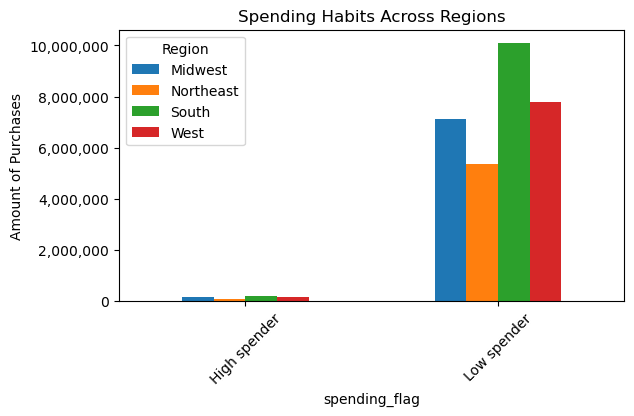

In [11]:
#Creating bar chart

spending_flag_region_bar = spending_flag_region_cross.plot.bar()

#Labeling bar chart
plt.title('Spending Habits Across Regions')
plt.ylabel('Amount of Purchases')

plt.xticks(rotation = 45)
plt.tight_layout(pad=3)

#Eliminating scientific notation
spending_flag_region_bar.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

#Exporting chart

spending_flag_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending flag region bar.png'))

In [12]:
#Comparing spenders across departments

spend_dept_cross = pd.crosstab(df['department'], df['spending_flag'])
spend_dept_cross

spending_flag,High spender,Low spender
department,,
alcohol,12805,131869
babies,4529,405863
bakery,28371,1092457
beverages,58474,2513427
breakfast,15050,656822
bulk,113,33338
canned goods,20432,991642
dairy eggs,109081,5068101
deli,16797,987037


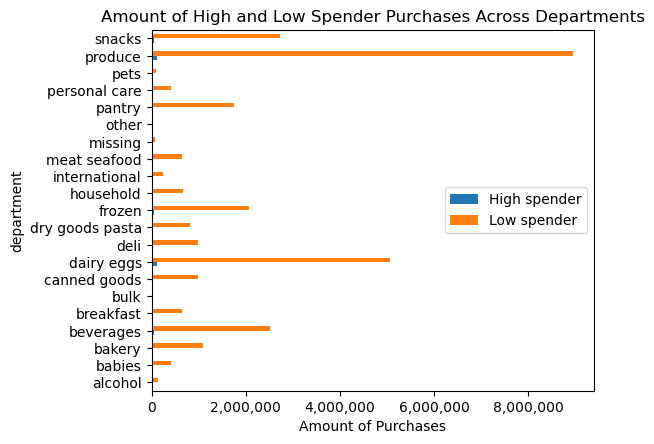

In [16]:
#Creating bar chart

spend_dept_bar = spend_dept_cross.plot.barh()

#Moving legend
plt.legend(loc='right', bbox_to_anchor=(1, 0.5))

#Labeling
plt.title('Amount of High and Low Spender Purchases Across Departments')
plt.xlabel('Amount of Purchases')

plt.tight_layout(pad=2)

#Removing scientific notation
spend_dept_bar.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

#Exporting chart
spend_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending flag dept.png'))

In [17]:
#Comparing Age groups across regions

age_region_cross = pd.crosstab(df['Age group'], df['Region'])
age_region_cross

Region,Midwest,Northeast,South,West
Age group,,,,
Young adult,1355904,1024011,1960737,1477199
Adult,1715187,1258347,2447152,1840938
Middle aged,2286553,1697664,3195103,2511085
Elderly,1904119,1484857,2708539,2098291


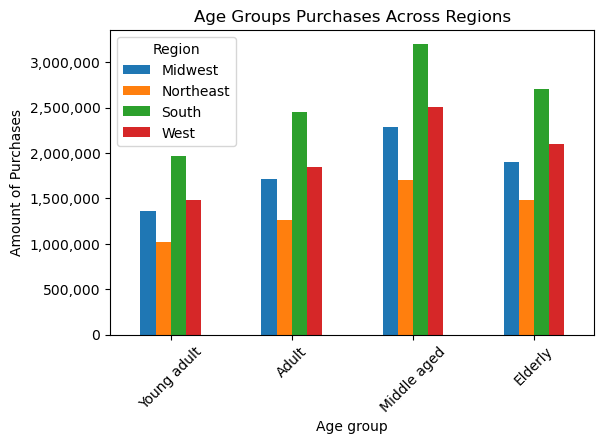

In [18]:
#Creating bar chart

age_region_bar = age_region_cross.plot.bar()

#Eliminating scientific notation
age_region_bar.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

#Labels
plt.title('Age Groups Purchases Across Regions')
plt.ylabel('Amount of Purchases')

plt.xticks(rotation = 45)
plt.tight_layout(pad=2)

#Exporting chart
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age group region bar.png'))

In [19]:
#Comparing age groups across departments

age_dept_cross = pd.crosstab(df['department'], df['Age group'])
age_dept_cross

Age group,Young adult,Adult,Middle aged,Elderly
department,,,,
alcohol,27942,33420,46592,36720
babies,77758,96520,129910,106204
bakery,210358,263669,350804,295997
beverages,477655,595539,814687,684020
breakfast,128341,156410,211603,175518
bulk,6414,7794,10298,8945
canned goods,192170,236621,315774,267509
dairy eggs,976278,1220342,1612490,1368072
deli,188533,235992,314110,265199


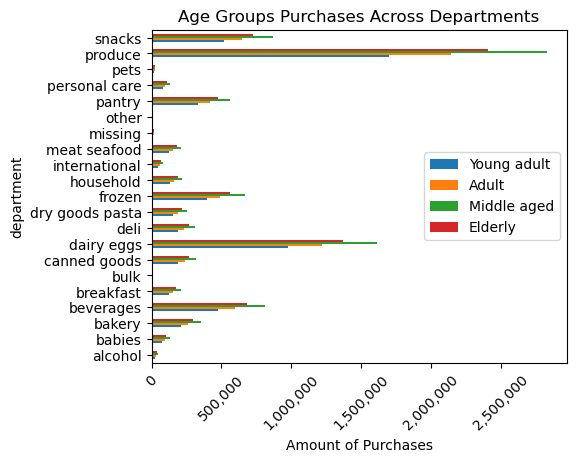

In [68]:
#Creating bar chart

age_dept_bar = age_dept_cross.plot.barh()

#Labeling
plt.title('Age Groups Purchases Across Departments')
plt.xlabel('Amount of Purchases')

#Removing scientific notation
age_dept_bar.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout(pad=3)
plt.xticks(rotation = 45)

#Moving legend
plt.legend(loc='right', bbox_to_anchor=(1, 0.5))

#Exporting Data
age_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age group dept bar.png'))

In [22]:
#Checking income brackets across regions

income_region_cross = pd.crosstab(df['Income Bracket'], df['Region'])
income_region_cross

Region,Midwest,Northeast,South,West
Income Bracket,,,,
Low Income,783797,587159,1142603,849124
Middle Income,3077755,2361140,4504825,3451393
High Income,3400211,2516580,4664103,3626996


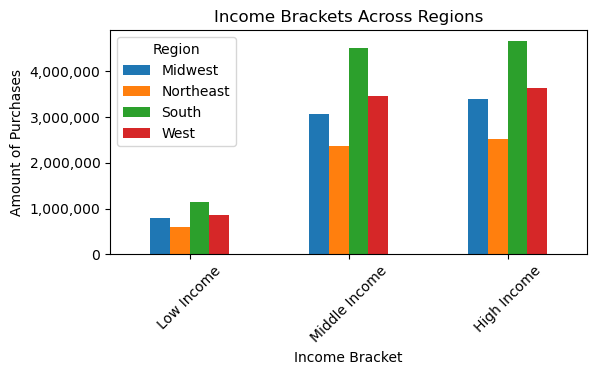

In [25]:
#Creating Bar Chart
income_region_bar = income_region_cross.plot.bar()

#Labeling
plt.title('Income Brackets Across Regions')
plt.ylabel('Amount of Purchases')

plt.xticks(rotation = 45)
plt.tight_layout(pad=4.5)

#Removing scientific notation
income_region_bar.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

#Exporting Chart
income_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income bracket region bar.png'))

In [26]:
#Comparing income bracket across departments

income_dept_cross = pd.crosstab(df['department'], df['Income Bracket'])
income_dept_cross

Income Bracket,Low Income,Middle Income,High Income
department,,,
alcohol,18050,57446,69178
babies,29240,184448,196704
bakery,106757,486360,527711
beverages,383121,1062318,1126462
breakfast,91525,282324,298023
bulk,4676,14557,14218
canned goods,78975,447846,485253
dairy eggs,502363,2268608,2406211
deli,106448,435287,462099


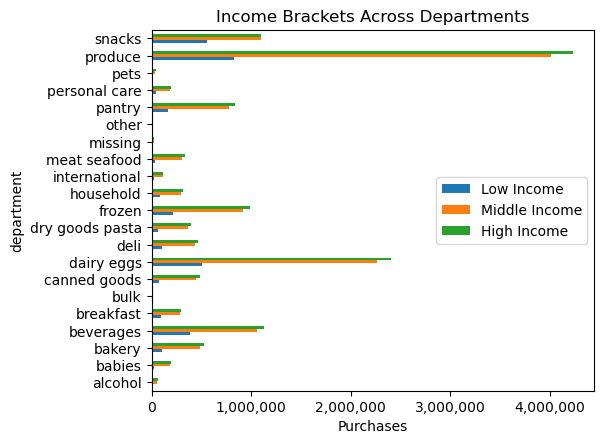

In [29]:
#Creating bar chart
income_dept_bar = income_dept_cross.plot.barh()

#Labeling
plt.title('Income Brackets Across Departments')
plt.xlabel('Purchases')

#Removing scientific notation
income_dept_bar.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

#Moving legend
plt.legend(loc='right', bbox_to_anchor=(1, 0.5))

plt.tight_layout(pad=2)

#Changing x ticks
income_dept_bar.xaxis.set_major_locator(mticker.MultipleLocator(1000000))

#Exporting Chart
income_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income bracket department bar.png'))

In [30]:
#Comparing region and provider status

provider_region_cross = pd.crosstab(df['Provider status'], df['Region'])
provider_region_cross

Region,Midwest,Northeast,South,West
Provider status,,,,
"single, no dep",1822890,1354550,2582036,1980540
"single, dep",351447,256433,505473,367855
"married, no dep",1719725,1289584,2369020,1833005
"married, dep",3367701,2564312,4855002,3746113


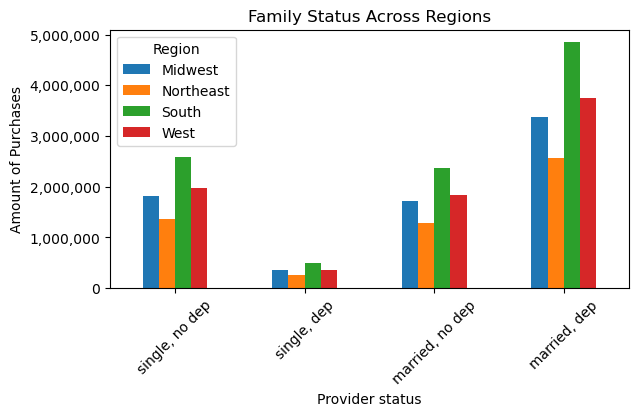

In [31]:
#Creating bar chart
provider_region_bar = provider_region_cross.plot.bar()

#Creating labels
plt.title('Family Status Across Regions')
plt.ylabel('Amount of Purchases')

plt.xticks(rotation = 45)
plt.tight_layout(pad=3)

#Removing Scientific Notation
provider_region_bar.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

#Exporting chart
provider_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'provider status region bar.png'))

In [71]:
#Comparing provider status across departments

provider_dept_cross = pd.crosstab(df['department'], df['Provider status'])
provider_dept_cross.to_clipboard()
provider_dept_cross

Provider status,"single, no dep","single, dep","married, no dep","married, dep"
department,,,,
alcohol,36852,8380,33254,66188
babies,103328,19381,92835,194848
bakery,281395,53684,262182,523567
beverages,645341,119107,597819,1209634
breakfast,166720,33233,158201,313718
bulk,8000,1633,8094,15724
canned goods,251020,48477,236125,476452
dairy eggs,1294376,250207,1211140,2421459
deli,253382,48119,231739,470594


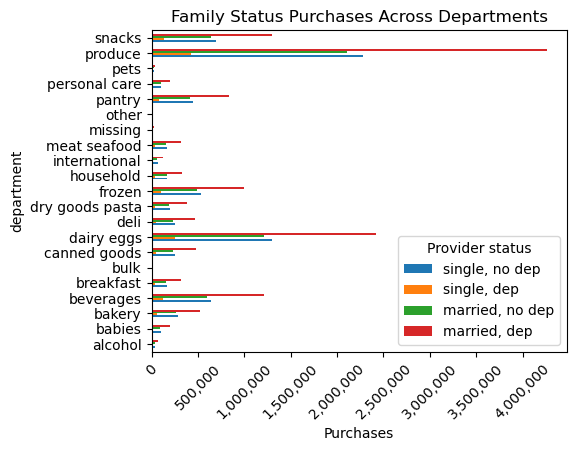

In [35]:
#Creating bar chart
provider_dept_bar = provider_dept_cross.plot.barh()

#Labeling chart
plt.title('Family Status Purchases Across Departments')
plt.xlabel('Purchases')
plt.xticks(rotation = 45)
plt.tight_layout(pad=3)

#Removing Scientific Notation
provider_dept_bar.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

#Exporting chart
provider_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'provider department bar.png'))

In [36]:
#Percentage with married with dependants in each department

PDC = provider_dept_cross
PDC['Percentage with Dependants'] = PDC['married, dep'] /(PDC['single, no dep'] + PDC['single, dep']
                                                                                + PDC['married, no dep'] + PDC['married, dep']) * 100

PDC

Provider status,"single, no dep","single, dep","married, no dep","married, dep",Percentage with Dependants
department,,,,,
alcohol,36852,8380,33254,66188,45.749755
babies,103328,19381,92835,194848,47.478508
bakery,281395,53684,262182,523567,46.712520
beverages,645341,119107,597819,1209634,47.032681
breakfast,166720,33233,158201,313718,46.693120
bulk,8000,1633,8094,15724,47.006069
canned goods,251020,48477,236125,476452,47.076795
dairy eggs,1294376,250207,1211140,2421459,46.771757
deli,253382,48119,231739,470594,46.879663


In [101]:
#Exporting Data
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Final Data.pkl'))

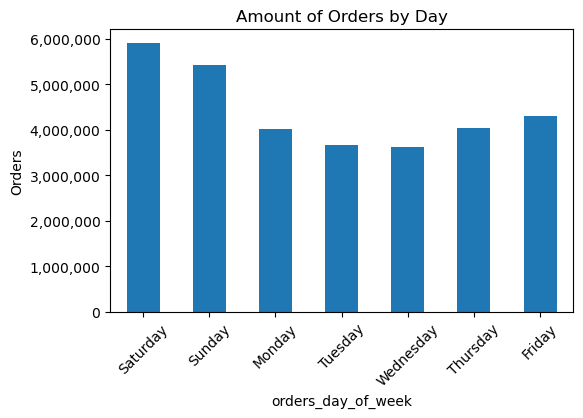

In [39]:
#Redoing visualizations with updated data
#Creating barchart of orders per day

PDB = df['orders_day_of_week'].value_counts().sort_index().plot.bar() #PDB

#Customizing barchart

plt.title('Amount of Orders by Day')
plt.ylabel('Orders')
plt.tight_layout(pad=5)

#Removing Scientific Notation
PDB.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

#Renaming x axis
#Defining days of week

days = {0: "Saturday", 1: "Sunday", 2: "Monday", 3: "Tuesday", 4: "Wednesday",
        5: "Thursday", 6: "Friday"}

#Setting days of week

PDB.set_xticklabels([days[i] for i in sorted(df['orders_day_of_week'].unique())], rotation=45)

#Exporting chart
PDB.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Purchases by Day bar.png'))

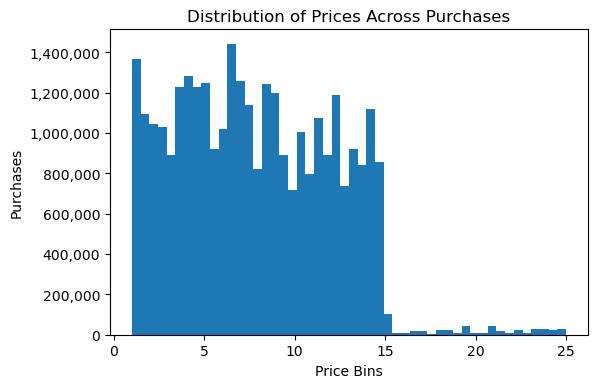

In [40]:
#Creating histogram of prices

PH = df['prices'].plot.hist(bins = 50)

#Labeling histogram
plt.title('Distribution of Prices Across Purchases')
plt.ylabel('Purchases')
plt.xlabel('Price Bins')

plt.tight_layout(pad=4)

#Removing scientific notation
PH.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

#Exporting histogram
PH.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Product Price Distribution.png'))

In [51]:
df['price_range_loc'].value_counts(dropna = False).reindex(price_order).to_clipboard()

In [44]:
df.loc[df['prices'] < 5, 'price_range_loc'] = 'Low-range product'

In [45]:
df.loc[(df['prices'] >= 5) & (df['prices'] <= 15), 'price_range_loc'] = 'Mid-range product'

In [46]:
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [49]:
price_order = ['Low-range product', 'Mid-range product', 'High-range product']

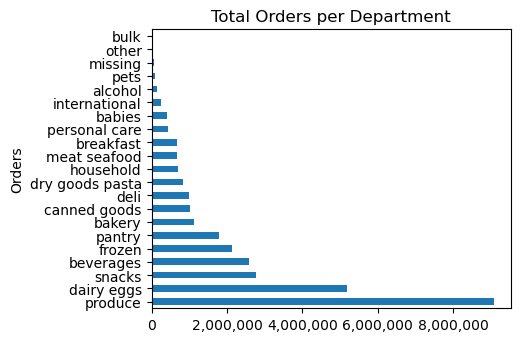

In [58]:
#Creating department bar chart

dept_bar = df['department'].value_counts().plot.barh()

#Labeling
plt.title('Total Orders per Department')
plt.ylabel('Orders')
plt.tight_layout(pad = 5)

#Removing Scientific notation
dept_bar.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

#Exporting chart
dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Department Bar.png'))

In [66]:
Total_Dept_Spending = df.groupby('department')['prices'].sum().sort_values(ascending = True)

C:\Users\luiss\AppData\Local\Temp\ipykernel_20908\2116465468.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Total_Dept_Spending = df.groupby('department')['prices'].sum().sort_values(ascending = True)


In [67]:
Total_Dept_Spending.to_clipboard()